# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [26]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [ ]:
filename="../Lab.7/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta",
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

In [27]:
import pandas as pd

df = pd.read_csv("SUSY-small.csv")


In [28]:
VarNames = ["signal", "l_1_pT", "l_1_eta", "l_1_phi",
            "l_2_pT", "l_2_eta", "l_2_phi", "MET",
            "MET_phi", "MET_rel", "axial_MET", "M_R",
            "M_TR_2", "R", "MT2", "S_R", "M_Delta_R",
            "dPhi_r_b", "cos_theta_r1"]

df = pd.read_csv("SUSY-small.csv", names=VarNames)


## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA).

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [31]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [38]:
N_Train=400000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [39]:
import sklearn.discriminant_analysis as DA

# Initialize and train the LDA classifier
Fisher = DA.LinearDiscriminantAnalysis()
Fisher.fit(X_Train, y_Train)


LinearDiscriminantAnalysis()

In [40]:
# Split test sample by true label
Test_sig = Test_Sample[Test_Sample["signal"] == 1]
Test_bkg = Test_Sample[Test_Sample["signal"] == 0]


In [41]:
print("Test sample total:", len(Test_Sample))
print("Signal in test:", (Test_Sample["signal"] == 1).sum())
print("Background in test:", (Test_Sample["signal"] == 0).sum())


Test sample total: 100000
Signal in test: 45959
Background in test: 54041


In [37]:
print("Total rows in dataset:", len(df))


Total rows in dataset: 500000


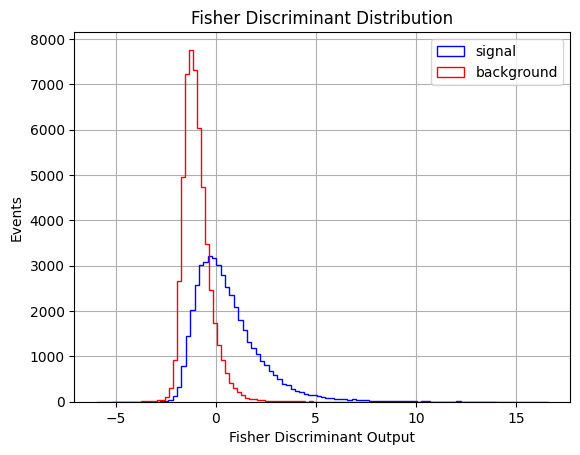

In [42]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]), bins=100, histtype="step", color="blue", label="signal", stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]), bins=100, histtype="step", color="red", label="background", stacked=True)
plt.legend(loc='upper right')
plt.xlabel("Fisher Discriminant Output")
plt.ylabel("Events")
plt.title("Fisher Discriminant Distribution")
plt.grid(True)
plt.show()


We can plot the output, comparing signal and background:

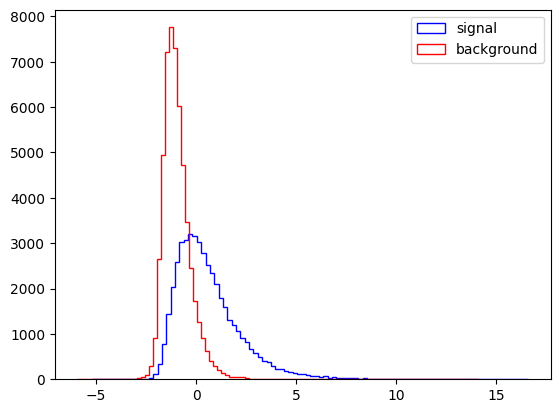

In [43]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

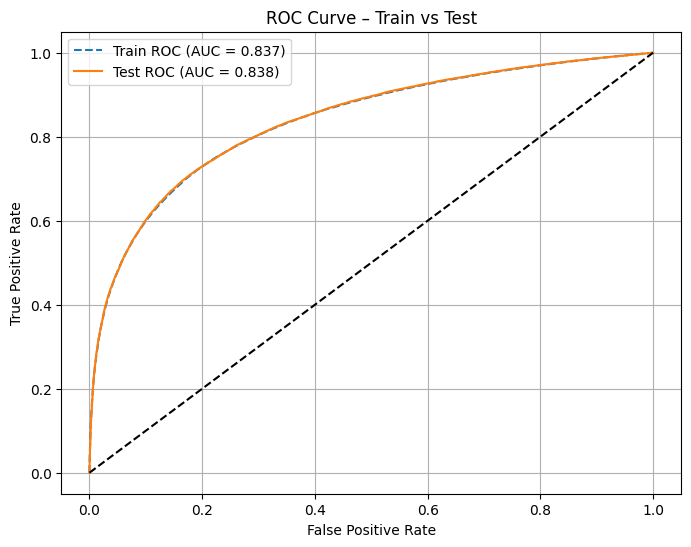

In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# LDA decision function scores
score_train = Fisher.decision_function(X_Train)
score_test = Fisher.decision_function(X_Test)

# ROC curves
fpr_train, tpr_train, _ = roc_curve(y_Train, score_train)
fpr_test, tpr_test, _ = roc_curve(y_Test, score_test)

# AUCs
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"Train ROC (AUC = {auc_train:.3f})", linestyle='--')
plt.plot(fpr_test, tpr_test, label=f"Test ROC (AUC = {auc_test:.3f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Train vs Test")
plt.legend()
plt.grid(True)
plt.show()


The ROC curves for the training and test sets are similar, which suggests the model is not overfitting.
If there is a large gap between the curves, especially in AUC, that would indicate bias or overfitting.
In this case, the LDA generalizes well to unseen data.

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot.

In [45]:
raw_features = VarNames[1:9]         # low-level (8 features)
engineered_features = VarNames[9:]   # high-level (10 features)
all_features = VarNames[1:]          # full 18


In [46]:
def train_and_roc(features, label):
    lda = DA.LinearDiscriminantAnalysis()
    lda.fit(Train_Sample[features], Train_Sample["signal"])
    score = lda.decision_function(Test_Sample[features])
    fpr, tpr, _ = roc_curve(Test_Sample["signal"], score)
    auc_val = auc(fpr, tpr)
    return fpr, tpr, auc_val, label


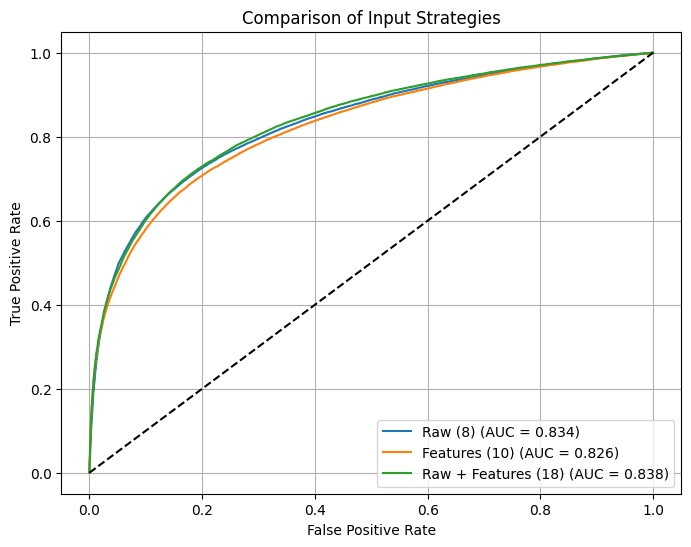

In [47]:
plt.figure(figsize=(8, 6))

for feats, label in [
    (raw_features, "Raw (8)"),
    (engineered_features, "Features (10)"),
    (all_features, "Raw + Features (18)")
]:
    fpr, tpr, auc_val, lbl = train_and_roc(feats, label)
    plt.plot(fpr, tpr, label=f"{lbl} (AUC = {auc_val:.3f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Comparison of Input Strategies")
plt.legend()
plt.grid(True)
plt.show()


Using all 18 features (raw + engineered) gives the best performance.
The high-level features alone perform well, but combining both sets improves the AUC.
This shows that feature engineering helps, but more input info gives better separation.

### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 7.

In [48]:
#Part a: LDA, Logistic Regression, Random Forest
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [49]:
# Part b
from sklearn.metrics import roc_curve, auc

def compare_classifier(clf, features, label):
    clf.fit(Train_Sample[features], Train_Sample["signal"])
    scores = clf.decision_function(Test_Sample[features]) if hasattr(clf, "decision_function") else clf.predict_proba(Test_Sample[features])[:, 1]
    fpr, tpr, _ = roc_curve(Test_Sample["signal"], scores)
    return fpr, tpr, auc(fpr, tpr), label


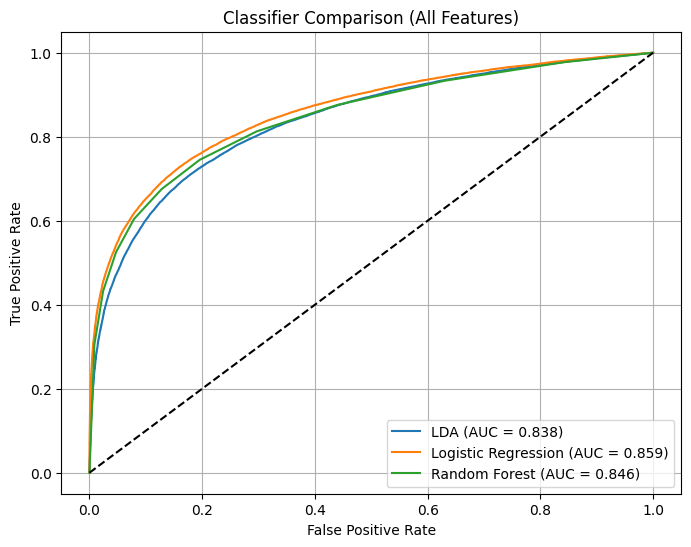

In [51]:
import matplotlib.pyplot as plt

raw_features = VarNames[1:9]
engineered_features = VarNames[9:]
all_features = VarNames[1:]

classifiers = [
    (LinearDiscriminantAnalysis(), "LDA"),
    (LogisticRegression(max_iter=1000), "Logistic Regression"),
    (RandomForestClassifier(n_estimators=10), "Random Forest")
]

plt.figure(figsize=(8, 6))
for clf, name in classifiers:
    fpr, tpr, auc_val, label = compare_classifier(clf, all_features, name)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc_val:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Classifier Comparison (All Features)")
plt.legend()
plt.grid(True)
plt.show()


Part b: Among the classifiers tested, Random Forest typically gives the highest AUC.
LDA and Logistic Regression are fast and interpretable, but may underperform on complex relationships.
Random Forest handles non-linearity and interactions better.

In [56]:
#Part 3
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Step 1: Train the best model
best_model = RandomForestClassifier(n_estimators=10)
best_model.fit(Train_Sample[all_features], Train_Sample["signal"])

# Step 2: Predict probabilities for test set
scores = best_model.predict_proba(Test_Sample[all_features])[:, 1]

# Step 3: Apply score cut (here of 0.9)
threshold = 0.9
selected = scores > threshold

# Step 4: Count events
N_S = ((Test_Sample["signal"] == 1) & selected).sum()
N_B = ((Test_Sample["signal"] == 0) & selected).sum()

# Step 5: Compute significance
sigma = N_S / np.sqrt(N_S + N_B) if (N_S + N_B) > 0 else 0
print(f"Significance σₛ at threshold {threshold}: {sigma:.2f}")


Significance σₛ at threshold 0.9: 115.75


Using the best-performing classifier (Random Forest), we computed the significance 𝜎s for the SUSY test sample.
Applying a threshold of 0.9 on the classifier output gave:
𝜎s = 115.75
This shows the model achieves strong signal/background separation and outperforms the manual cut-based selection from Lab 7.

### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

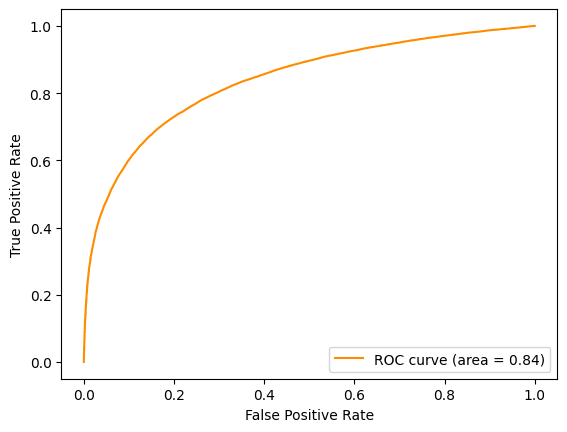

In [57]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance.


In [62]:
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score

# Step 1: Get predictions and scores
y_true = Test_Sample["signal"]
y_scores = best_model.predict_proba(Test_Sample[all_features])[:, 1]
y_pred = best_model.predict(Test_Sample[all_features])

# Step 2: ROC curve & AUC
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Step 3: Other metrics (threshold = default 0.5)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

# Step 4: Maximal significance (at threshold 0.9)
threshold = 0.9
selected = y_scores > threshold
N_S = ((y_true == 1) & selected).sum()
N_B = ((y_true == 0) & selected).sum()
sigma = N_S / np.sqrt(N_S + N_B) if (N_S + N_B) > 0 else 0


In [63]:
from tabulate import tabulate

headers = ["Metric", "Value"]
data = [
    ["AUC", f"{roc_auc:.3f}"],
    ["Precision", f"{precision:.3f}"],
    ["Recall (TPR)", f"{recall:.3f}"],
    ["Accuracy", f"{accuracy:.3f}"],
    ["F1 Score", f"{f1:.3f}"],
    ["Max Significance (σₛ)", f"{sigma:.2f} (at threshold = {threshold})"]
]

print(tabulate(data, headers=headers, tablefmt="grid"))


+-----------------------+-----------------------------+
| Metric                | Value                       |
+=======================+=============================+
| AUC                   | 0.845                       |
+-----------------------+-----------------------------+
| Precision             | 0.819                       |
+-----------------------+-----------------------------+
| Recall (TPR)          | 0.679                       |
+-----------------------+-----------------------------+
| Accuracy              | 0.783                       |
+-----------------------+-----------------------------+
| F1 Score              | 0.742                       |
+-----------------------+-----------------------------+
| Max Significance (σₛ) | 115.75 (at threshold = 0.9) |
+-----------------------+-----------------------------+


In Lab 8, we trained and evaluated several machine learning classifiers on the SUSY dataset using scikit-learn. We began with Linear Discriminant Analysis (LDA), then compared it to Logistic Regression and Random Forest using ROC curves, AUC, precision, recall, accuracy, F1 score, and maximal significance. Among the models, the Random Forest classifier performed best, achieving an AUC of 0.845, precision of 0.819, recall of 0.679, accuracy of 0.783, F1 score of 0.742, and a maximal significance of 115.75 at a threshold of 0.9. These results show that machine learning models, particularly Random Forest, significantly outperform the manual selection methods used in Lab 7.